Part 1
Question 2:

Question 1:
1. The analysis is quite sensitive to outlier and the size of the smallest group must be larger than the number of predictor variables.

Multivariate normality: Independant normal variables.

Inpependence: Participants are assumed to be randomly sampled.

2. Observation of each class is drawn from a normal distribution.

Assumes each class has it's own covariance matrix.

3. Assumes a certain distance evaluation has been chosen (euclidian, manhattan, etc.) That the k chosen is smaller than the smallest class. (This I wrote on my own, not sure if there is more to this).

4. CART does not seem to have any initial assumptions.

Question 2:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, cross_validate
from copy import deepcopy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C:\Users\anton\AppData\Local\Temp/ipykernel_4240/2450044795.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mean=[4, 4], cov=covariance_1, size=(400))


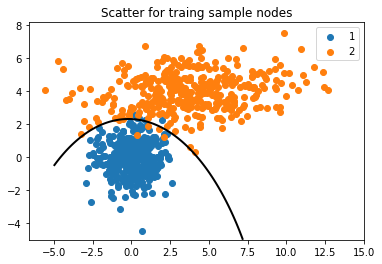

In [27]:
X1 = np.random.standard_normal((2, 400))
covariance_1 = [[10, 1],[-2, 1]]
X2 = np.random.multivariate_normal(mean=[4, 4], cov=covariance_1, size=(400))
X2 = np.transpose(X2)

train_X1 = X1[:, :360]
test_X1 = X1[:, 360:]
train_X2 = X2[:, :360]
test_X2 = X2[:, 360:]

X_0_train = np.vstack((train_X1[0,:], train_X2[0,:])).flatten()
X_1_train = np.vstack((train_X1[1,:], train_X2[1,:])).flatten()
X_train = np.zeros((720, 3))
X_train[:, 0] = X_0_train
X_train[:, 1] = X_1_train
X_train[:360, 2] = 1
X_train[360:, 2] = 2 
X_0_train = np.vstack((test_X1[0,:], test_X2[0,:])).flatten()
X_1_train = np.vstack((test_X1[1,:], test_X2[1,:])).flatten()
X_test = np.zeros((80, 3))
X_test[:, 0] = X_0_train
X_test[:, 1] = X_1_train
X_test[:40, 2] = 1
X_test[40:, 2] = 2 
np.random.shuffle(X_test)
np.random.shuffle(X_train)

model = QuadraticDiscriminantAnalysis(store_covariance=True)
model.fit(X_train[:, :2], X_train[:, 2:].ravel())

# Create the line
xx, yy = np.meshgrid(np.linspace(-5, 15, 200), np.linspace(-5, 5, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')

plt.scatter(train_X1[0], train_X1[1], label="1")
plt.scatter(train_X2[0], train_X2[1], label="2")
plt.legend()
plt.title('Scatter for traing sample nodes')
plt.show()


The prediction correctness for test_values: 100.0%


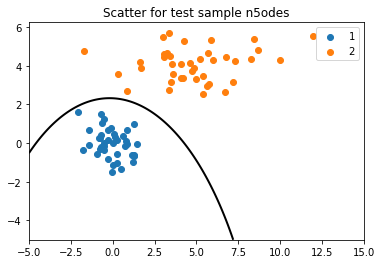

In [33]:

# Small prediction algo
checks = 0
for i in range(80):
    prediction = model.predict([X_test[i, :2]])
    if prediction == X_test[i, 2:]:
        checks += 1
print(f'The prediction correctness for test_values: {checks/80*100}%')

plt.scatter(test_X1[0], test_X1[1], label="1")
plt.scatter(test_X2[0], test_X2[1], label="2")
xx, yy = np.meshgrid(np.linspace(-5, 15, 200), np.linspace(-5, 5, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.legend()
plt.title('Scatter for test sample n5odes')
plt.show()

Part 2 - CART

In [64]:
X_train = np.zeros((160, 3))
X_test = np.zeros((40, 3))


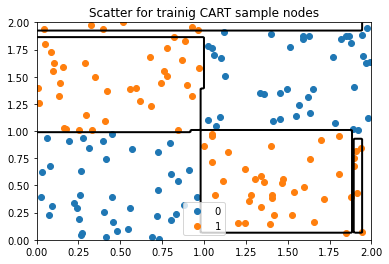

In [77]:
# Insert the different ranges

X_train[0:40, 0] = np.random.uniform(0, 1, size=40)
X_train[0:40, 1] = np.random.uniform(0, 1, size=40)
X_train[0:40, 2] = 0
X_test[0:10, 0] =    np.random.uniform(0, 1, size=10)
X_test[0:10, 1] =    np.random.uniform(0, 1, size=10)
X_test[0:10, 2] = 0
X_train[40:80, 0] = np.random.uniform(0, 1, size=40)
X_train[40:80, 1] = np.random.uniform(1, 2, size=40)
X_train[40:80, 2] = 1
X_test[10:20, 0] =    np.random.uniform(0, 1, size=10)
X_test[10:20, 1] =    np.random.uniform(1, 2, size=10)
X_test[10:20, 2] = 0
X_train[80:120, 0] = np.random.uniform(1, 2, size=40)
X_train[80:120, 1] = np.random.uniform(0, 1, size=40)
X_train[80:120, 2] = 1
X_test[20:30, 0] =    np.random.uniform(1, 2, size=10)
X_test[20:30, 1] =    np.random.uniform(0, 1, size=10)
X_test[20:30, 2] = 1
X_train[120:160, 0] = np.random.uniform(1, 2, size=40)
X_train[120:160, 1] = np.random.uniform(1, 2, size=40)
X_train[120:160, 2] = 0
X_test[30:40, 0] =    np.random.uniform(1, 2, size=10)
X_test[30:40, 1] =    np.random.uniform(1, 2, size=10)
X_test[30:40, 2] = 0
np.random.shuffle(X_train)
np.random.shuffle(X_test)

model = DecisionTreeClassifier()
model = model.fit(X_train[:, :2], X_train[:, 2:])

X_train_0 = np.array([row[:2] for row in X_train if row[2] == 0])
X_train_1 = np.array([row[:2] for row in X_train if row[2] == 1])
X_test_0 = np.array([row[:2] for row in X_train if row[2] == 0])
X_test_1 = np.array([row[:2] for row in X_train if row[2] == 1])

xx, yy = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 2, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label="0")
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label="1")

plt.legend()
plt.title('Scatter for trainig CART sample nodes')
plt.show()





The prediction correctness for test_values: 75.0%


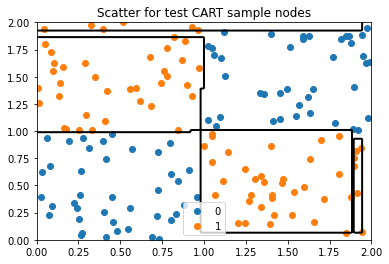

In [78]:
checks = 0
for i in range(40):
    prediction = model.predict([X_test[i, :2]])
    if prediction == X_test[i, 2:]:
        checks += 1

print(f'The prediction correctness for test_values: {checks/40*100}%')

xx, yy = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 2, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.scatter(X_test_0[:, 0], X_test_0[:, 1], label="0")
plt.scatter(X_test_1[:, 0], X_test_1[:, 1], label="1")

plt.legend()
plt.title('Scatter for test CART sample nodes')
plt.show()


In [80]:
# Load UCI breast cancer dataset with column names and remove ID column
uci_bc_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", 
    sep=",",
    header=None,
    names=[
        "id_number", "diagnosis", "radius_mean",
        "texture_mean", "perimeter_mean", "area_mean",
        "smoothness_mean", "compactness_mean",
        "concavity_mean","concave_points_mean",
        "symmetry_mean", "fractal_dimension_mean",
        "radius_se", "texture_se", "perimeter_se",
        "area_se", "smoothness_se", "compactness_se",
        "concavity_se", "concave_points_se",
        "symmetry_se", "fractal_dimension_se",
        "radius_worst", "texture_worst",
        "perimeter_worst", "area_worst",
        "smoothness_worst", "compactness_worst",
        "concavity_worst", "concave_points_worst",
        "symmetry_worst", "fractal_dimension_worst"
    ],).drop("id_number", axis=1)

y = uci_bc_data.diagnosis.map({"B": 0, "M": 1}).to_numpy()
X = uci_bc_data.drop("diagnosis", axis=1).to_numpy()

In [89]:
print(f'number of Bs:{len(y[y==0])=}, number of Ms:{len(y[y==1])=}')
print(uci_bc_data)
print(f'The features seem to be numerical')
print(f'Some of them have the same scale, but some probably need to be scaled')

number of Bs:len(y[y==0])=357, number of Ms:len(y[y==1])=212
    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0      

In [90]:
# Closer look at means and variance
for i in uci_bc_data:
    if i == 'diagnosis':
        continue
    mean_i = np.mean(uci_bc_data[i])
    var_i = np.var(uci_bc_data[i])
    print(f'{i}: mean={mean_i:.4f}, var={var_i:.4f}')

radius_mean: mean=14.1273, var=12.3971
texture_mean: mean=19.2896, var=18.4664
perimeter_mean: mean=91.9690, var=589.4028
area_mean: mean=654.8891, var=123625.9031
smoothness_mean: mean=0.0964, var=0.0002
compactness_mean: mean=0.1043, var=0.0028
concavity_mean: mean=0.0888, var=0.0063
concave_points_mean: mean=0.0489, var=0.0015
symmetry_mean: mean=0.1812, var=0.0008
fractal_dimension_mean: mean=0.0628, var=0.0000
radius_se: mean=0.4052, var=0.0768
texture_se: mean=1.2169, var=0.3038
perimeter_se: mean=2.8661, var=4.0807
area_se: mean=40.3371, var=2065.7946
smoothness_se: mean=0.0070, var=0.0000
compactness_se: mean=0.0255, var=0.0003
concavity_se: mean=0.0319, var=0.0009
concave_points_se: mean=0.0118, var=0.0000
symmetry_se: mean=0.0205, var=0.0001
fractal_dimension_se: mean=0.0038, var=0.0000
radius_worst: mean=16.2692, var=23.3192
texture_worst: mean=25.6772, var=37.7101
perimeter_worst: mean=107.2612, var=1127.1464
area_worst: mean=880.5831, var=323597.6709
smoothness_worst: mean

In [153]:
def accuracy(cm: np.array) -> float:
    tn, _, _, tp = cm.ravel()
    return (tp+tn)/sum(cm.ravel())

def sensitivity(cm: np.array) -> float:
    tn, _, _, tp = cm.ravel()
    return tp/(tp+tn)

def specificity(cm: np.array) -> float:
    tn, fp, _, _ = cm.ravel()
    return tn/(tn+fp)

def precision(cm: np.array) -> float:
    _, fp, _, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm: np.array) -> float:
    _, _, fn, tp = cm.ravel()
    return tp/(tp+fn)

def F_1_score(prec, rec) -> float:
    return 2*prec*rec/(prec+rec)

def MCC(cm) -> float:
    tn, fp, fn, tp = cm.ravel()
    return (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))

fold_size=56, sum(sum(model_cms[x]))=56.0
for x='lda', acc=0.9571, sens=0.3433, spec=0.9944, prec=0.9892, rec=0.8932, f1_score=0.9388, mcc=0.9087


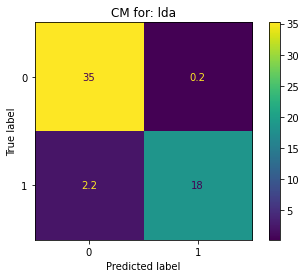

fold_size=56, sum(sum(model_cms[x]))=56.0
for x='qda', acc=0.9571, sens=0.3619, spec=0.9661, prec=0.9417, rec=0.9417, f1_score=0.9417, mcc=0.9078


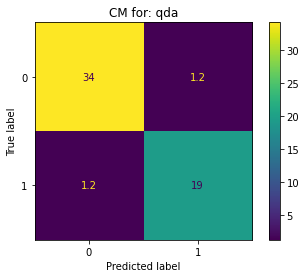

fold_size=56, sum(sum(model_cms[x]))=56.0
for x='cart', acc=0.9196, sens=0.3650, spec=0.9237, prec=0.8744, rec=0.9126, f1_score=0.8931, mcc=0.8293


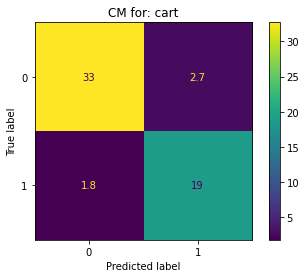

C:\Users\anton\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anton\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

fold_size=56, sum(sum(model_cms[x]))=56.0
for x='log_reg', acc=0.9375, sens=0.3562, spec=0.9548, prec=0.9212, rec=0.9078, f1_score=0.9144, mcc=0.8653


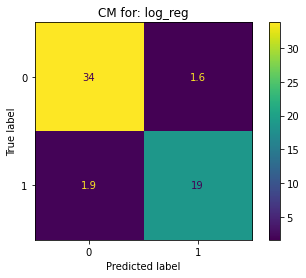

In [155]:
folds = 10
test_indexs = np.random.choice(range(folds), folds, replace=False)
fold_size = int(X.shape[0]/folds)
model_cms = dict()
models = ['lda', 'qda', 'cart', 'log_reg']
for model in models:
    model_cms[model] = np.zeros((2, 2))

for x in models:
    if x == 'lda':
        model = LinearDiscriminantAnalysis()
    elif x == 'qda':
        model = QuadraticDiscriminantAnalysis()
    elif x == 'cart':
        model = DecisionTreeClassifier()
    elif x == 'log_reg':
        model = LogisticRegression()

    for i in range(folds):
        train_X = deepcopy(X)
        train_y = deepcopy(y)
        index = test_indexs[i]
        test_range = range((index*fold_size),((index+1)*fold_size))
        test_X = X[test_range, :]
        test_y = y[test_range]
        train_X = np.delete(train_X, test_range, axis=0)
        train_y = np.delete(train_y, test_range)
        
        model = model.fit(train_X, train_y)
        prediction = model.predict(test_X)
        model_cms[x] += confusion_matrix(test_y, prediction, labels=model.classes_)


    model_cms[x] /= 10
    acc = accuracy(model_cms[x])
    sens = sensitivity(model_cms[x])
    spec = specificity(model_cms[x])
    prec = precision(model_cms[x])
    rec = recall(model_cms[x])
    f1_score = F_1_score(prec, rec)
    mcc = MCC(model_cms[x])

    print(f'{fold_size=}, {sum(sum(model_cms[x]))=}')
    print(f'for {x=}, acc={acc:.4f}, sens={sens:.4f}, spec={spec:.4f}, prec={prec:.4f}, rec={rec:.4f}, f1_score={f1_score:.4f}, mcc={mcc:.4f}')
    disp = ConfusionMatrixDisplay(confusion_matrix=model_cms[x],
                                display_labels=model.classes_)
    disp.plot()
    plt.title(f'CM for: {x}')
    plt.show()

    
    



THEME: Detecting mislabeled observations

In [159]:
p = np.round(np.linspace(0,25,10))


[ 0.  3.  6.  8. 11. 14. 17. 19. 22. 25.]
